# **Data Analysis & Visualization**
> *presented by*\
| Bryan Kors | bkors001@odu.edu | [bryan255.github.io](https://bryan255.github.io/#aboutme) |\
| Dipendra Thapa Magar | dthap001@odu.edu | [dipendrathapamagar.github.io](https://dipendrathapamagar.github.io) |

-------


# **Problem Statement**
---
This dataset is from UC Irvine and was donated on August 3, 2007. It includes measures of compressive strength of concrete given various mixture measures and ages including water, cemenet, fly ash, etc.

---

1.   Data Preparation

*   Data Cleaning and Preprocessing
    *   Identify and handle missing or erroneous data.

    *   Standardize data formats and address inconsistencies.

*   Feature Selection
   *   Employ techniques to select relevant features for analysis.
   *   Determine the most impactful variables for the project.

2.   Data Analysis

*   Determine which components have a large impact on compressive strength

3.   Data Visualization

*   Customized Data Visualization
   *   Develop visualizations tailored to project requirements.
   *   Utilize tools to present data in an easily understandable format.



# **Data Analysis**
---

Example of structure collapsed in history [here](https://www.thestreet.com/personal-finance/deadliest-structural-failures-ever#gid=ci02afd469a00025f0&pid=29-hyatt_regency_collapse_floor_view-wikipedia).

# **Datasets**
---
This is our primary dataset, which was obtained from [here](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength).  

The dataset is about compressive strength of Concrete which is important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# **Data Cleaning**

In [ ]:
# used to determine NaN counts and column data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

There are no null values in the dataset. No need to process null values.

Columns can be renamed for ease in analysis. Unless noted in parenthesis, components are measured in kg per cubic meter of mixture.

In [ ]:
# Find negative values in the entire DataFrame
negative_values_df = df[df < 0]

# Print or use the negative values as needed
print("Negative Values in DataFrame:")
print(negative_values_df)

Negative Values in DataFrame:
      Cement (component 1)(kg in a m^3 mixture)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
1025                                        NaN   
1026                                        NaN   
1027                                        NaN   
1028                                        NaN   
1029                                        NaN   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   NaN       
1                                                   NaN       
2                                                   NaN       
3                                                   NaN       
4                                         

There are no negative values.

In [ ]:
new_cols = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age (days)', 'Compressive Strength (MPa)']

df.columns = new_cols
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (days),Compressive Strength (MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Blast Furnace Slag, Fly Ash, and Superplasticizer have instances without these components. A boolean Y/N column was added for each.

In [ ]:
df.insert(2, 'Blast Furnace Slag (y/n)', np.where(df['Blast Furnace Slag']>0, 'Y', 'N'))
df.insert(4, 'Fly Ash (y/n)', np.where(df['Fly Ash']>0, 'Y', 'N'))
df.insert(7, 'Superplasticizer (y/n)', np.where(df['Superplasticizer']>0, 'Y', 'N'))
df.head()

,Cement,Blast Furnace Slag,Blast Furnace Slag (y/n),Fly Ash,Fly Ash (y/n),Water,Superplasticizer,Superplasticizer (y/n),Coarse Aggregate,Fine Aggregate,Age (days),Compressive Strength (MPa)
0,540.0,0.0,N,0.0,N,162.0,2.5,Y,1040.0,676.0,28,79.99
1,540.0,0.0,N,0.0,N,162.0,2.5,Y,1055.0,676.0,28,61.89
2,332.5,142.5,Y,0.0,N,228.0,0.0,N,932.0,594.0,270,40.27
3,332.5,142.5,Y,0.0,N,228.0,0.0,N,932.0,594.0,365,41.05
4,198.6,132.4,Y,0.0,N,192.0,0.0,N,978.4,825.5,360,44.30


# **Initial Data Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (days),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Compressive Strength (MPa),1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
df.groupby(by=['Blast Furnace Slag (y/n)', 'Fly Ash (y/n)', 'Superplasticizer (y/n)'])['Compressive Strength (MPa)'].describe()


count  \
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)          
N                        N             N                       209.0   
                                       Y                        23.0   
                         Y             N                         6.0   
                                       Y                       233.0   
Y                        N             N                       164.0   
                                       Y                       170.0   
                         Y             Y                       225.0   

                                                                    mean  \
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)              
N                        N             N                       29.805742   
                                       Y                       51.836957   
                         Y             N                       32.670000   
                                       Y                       31.183219   
Y                        N             N                       29.034817   
                                       Y                       50.761588   
                         Y             Y                       38.302044   

                                                                     std  \
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)              
N                        N             N                       14.645114   
                                       Y                       14.655099   
                         Y             N                       18.170947   
                                       Y                       13.299597   
Y                        N             N                       14.760800   
                                       Y                       17.014233   
                         Y             Y                       14.220164   

                                                                 min     25%  \
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)                  
N                        N             N                        6.27  18.130   
                                       Y                       25.10  41.370   
                         Y             N                       14.40  19.210   
                                       Y                        8.49  20.920   
Y                        N             N                        2.33  16.020   
                                       Y                       18.28  36.565   
                         Y             Y                        7.32  28.630   

                                                                 50%      75%  \
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)                   
N                        N             N                       27.63  38.6000   
                                       Y                       51.02  59.7400   
                         Y             N                       31.38  37.6100   
                                       Y                       31.42  40.7100   
Y                        N             N                       30.18  40.9075   
                                       Y                       52.31  65.1250   
                         Y             Y                       36.44  48.6700   

                                                                 max  
Blast Furnace Slag (y/n) Fly Ash (y/n) Superplasticizer (y/n)         
N                        N             N                       74.99  
                                       Y                       79.99  
                         Y             N                       64.02  
                                       Y                       66.42  
Y                        N             N                       56.14  
                                       Y                       82.60  
                         

Reviewing the binary combinations of Blast Furnace Slag, Fly Ash, and Superplasticizer, the two below combinations do not have a large enough sample size to draw a good conclusion


*   Blast Furnace Slag N, Fly Ash N, Superplasticizer Y = yields 23 samples
*   Blast Furnace slag N, Fly Ash Y, Superplasticizer N = yields 6 samples

The remaining combinations yields 164+ samples. Generally, the remaining combinations average compressive strength are from 29.8 MPa - 38.3 MPa but the Blast Furnace Y, Fly Ash N, Superplasticizer Y combination does have a noticably larger average compressive strength at 50.76 MPa.

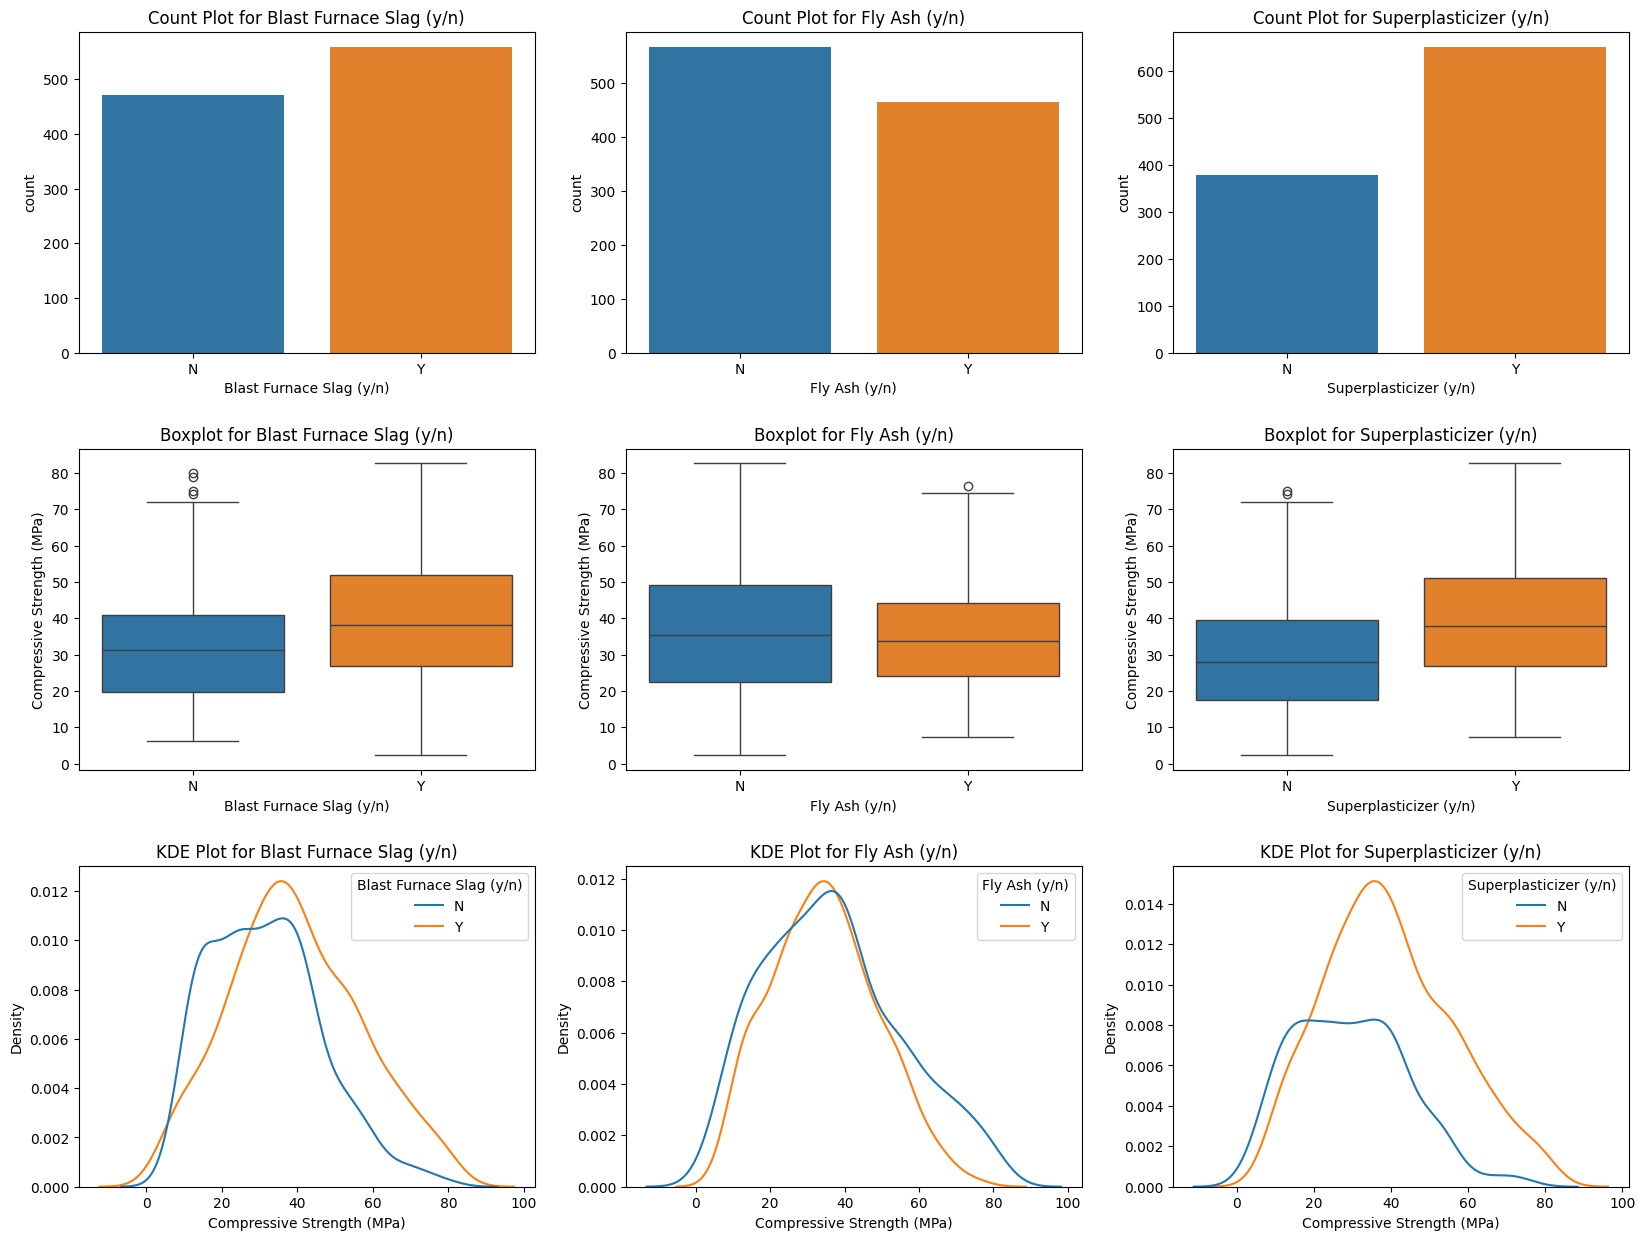

In [ ]:
plots = ['Blast Furnace Slag (y/n)', 'Fly Ash (y/n)', 'Superplasticizer (y/n)']

fig, ax = plt.subplots(3, 3, figsize=(20,15))

for i in range(len(plots)):
  df_1 = df.sort_values(by=plots[i])
  sns.countplot(df_1, x=plots[i], ax=ax[0, i], hue=plots[i], order=['N','Y'])
  ax[0, i].set_title(f'Count Plot for {plots[i]}')
  sns.boxplot(df_1, x=plots[i], y='Compressive Strength (MPa)', ax=ax[1, i], hue=plots[i])
  ax[1, i].set_title(f'Boxplot for {plots[i]}')
  sns.kdeplot(df_1, x='Compressive Strength (MPa)', hue=plots[i], ax=ax[2, i])
  ax[2, i].set_title(f'KDE Plot for {plots[i]}')

plt.subplots_adjust(hspace=.3)
plt.show()

The countplots show a significant sample size of each binary component of the concrete samples. We could do various hypothesis tests to conclude that there is a statistical significance between including an ingredient or not in relation to compressive strength.

Reviewing the boxplots, there appears to be a sizable difference in compressive strength for samples that included Blast Furnace Slag or Superplasticizer versus samples that did not include those two ingredients. It also appears the Fly Ash does not impact the compressive strengths.

This is also supported in the KDE plots although the PDF delta is much more noticable for the Superplasticizer. This is not surprising since Superplasticizer is used to "improve workability, speed finishing, increase strength, conserve cement and help reduce shrinkage and thermal cracking" according to the link below.

https://www.concreteconstruction.net/how-to/materials/how-super-are-superplasticizers_o

Concreteconstruction.net also mentions that Superplasticizer works in a few ways including "high-strength concrete by reducing the water and thus the water-cement ratio; or, to save cement by reducing both the water and cement contents while maintaining the same water-cement ratio and the same workability."

Both Water and Cement do show "on average" lower water or cement content when Superplasticizer is included. Reviewing the boxplots, there is a much more noticable gap with water content based on Superplasticizer's presence. Cement on the other hand shows sizable overlap in the IQR and also appears to be right skewed given the median is much lower than the mean for cement content with Superplasticizer content.

Finally, a correlation coefficient of -.25 between water content and cement content was determined for samples with Superplasticizer present. This is a weak, at best, correlation. I am not confident in concluding the Cement content decreases with the water content when there is also Superplasticizer.

In [ ]:
df.groupby(by=['Superplasticizer (y/n)'])[['Cement', 'Water']].describe().T

Superplasticizer (y/n)           N           Y
Cement count            379.000000  651.000000
       mean             294.977309  273.128264
       std              106.989075  102.259960
       min              102.000000  132.000000
       25%              207.100000  181.700000
       50%              296.000000  251.400000
       75%              350.000000  355.450000
       max              540.000000  540.000000
Water  count            379.000000  651.000000
       mean             196.338259  172.967896
       std               15.386706   19.568538
       min              146.000000  121.800000
       25%              186.000000  159.000000
       50%              192.000000  171.500000
       75%              203.250000  186.550000
       max              228.000000  247.000000

In [ ]:
sp_df = df[df['Superplasticizer (y/n)'] == 'Y']

water = sp_df['Water'].to_numpy()
cement = sp_df['Cement'].to_numpy()

corr_matrix = np.corrcoef(water, cement)
print(corr_matrix)

[[ 1.         -0.25656234]
 [-0.25656234  1.        ]]


Text(0.5, 1.05, 'Superplasticizer Status\nvs Water/Cement Content')

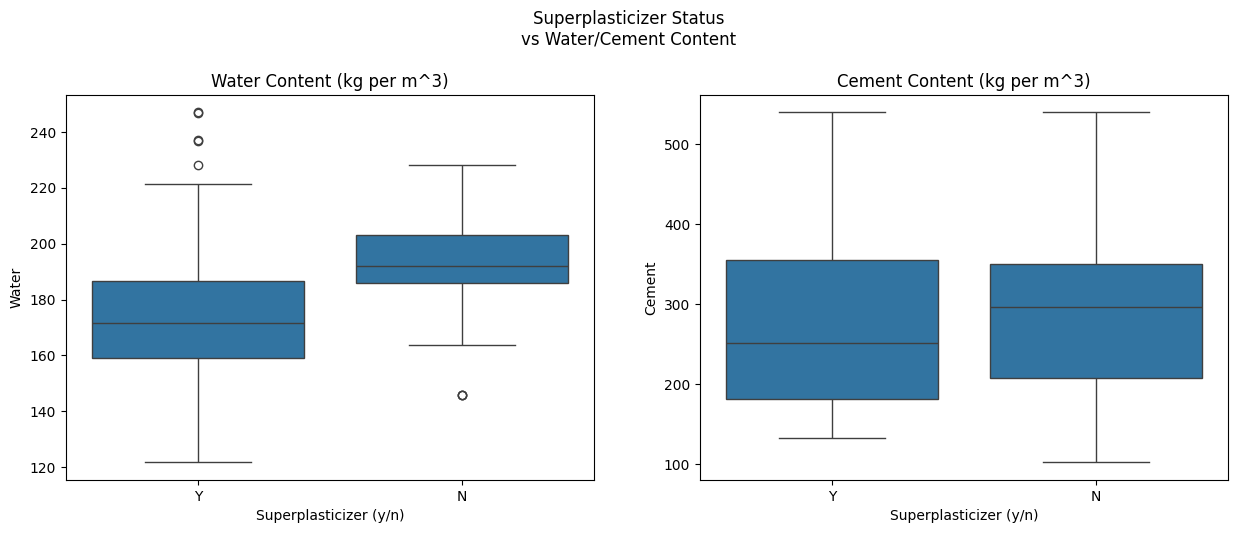

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(df, x='Superplasticizer (y/n)', y='Water', ax=ax[0])
sns.boxplot(df, x='Superplasticizer (y/n)', y='Cement', ax=ax[1])

ax[0].set_title('Water Content (kg per m^3)')
ax[1].set_title('Cement Content (kg per m^3)')

plt.suptitle('Superplasticizer Status\nvs Water/Cement Content', y=1.05)

# **Data Visualization**
---
# Boxplot
A boxplot is a statistical visualization that provide summary of the distribution of a dataset. It displays the central tendency, spread, and potential outliters in a concise and easily interpretable way. It is also known as Whisker plot.

#Outliers:
Q1-1.5 x IQR > outlier > Q3+1.5 x IQR

Saving Capture.PNG to Capture.PNG


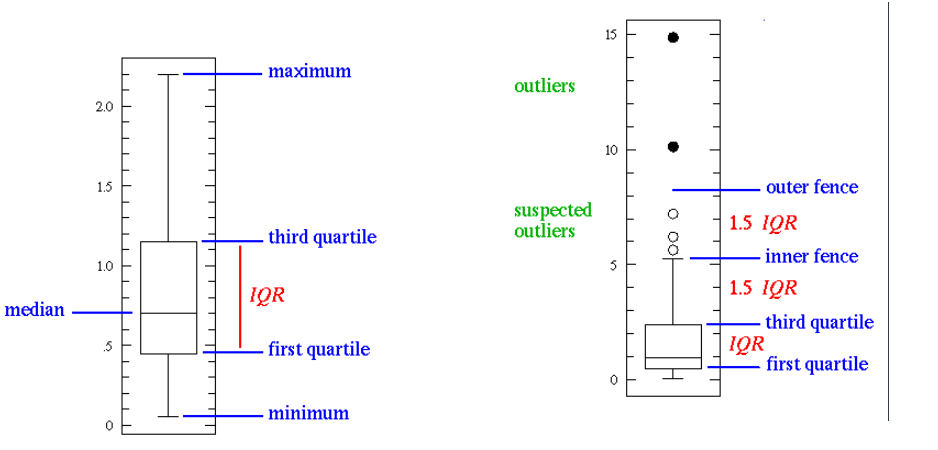

In [ ]:
from google.colab import files
from IPython.display import Image, display

# Upload the image file
uploaded = files.upload()

# Get the file name
image_filename = list(uploaded.keys())[0]

# Display the uploaded image
display(Image(filename=image_filename))

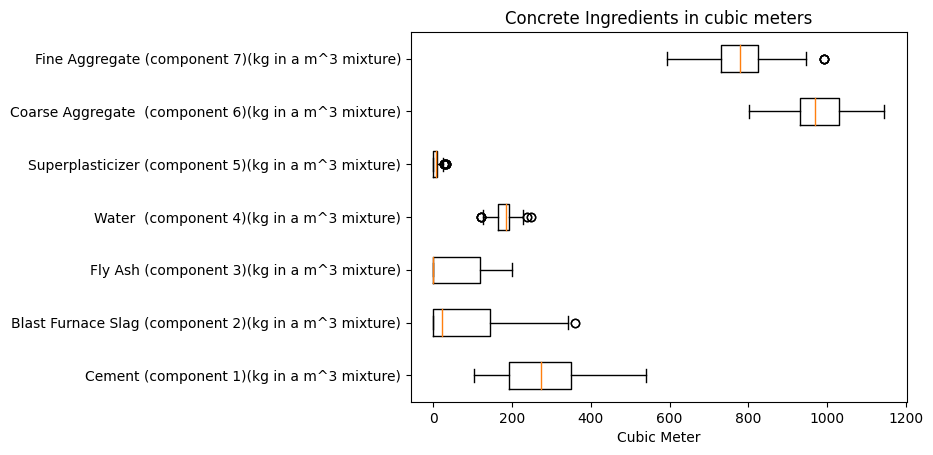

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")

plt.boxplot(df.loc[:,df.columns[:-2]], labels=df.columns[:-2], vert=False)
plt.title('Concrete Ingredients in cubic meters')
plt.xlabel('Cubic Meter')
plt.show()

<Axes: xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

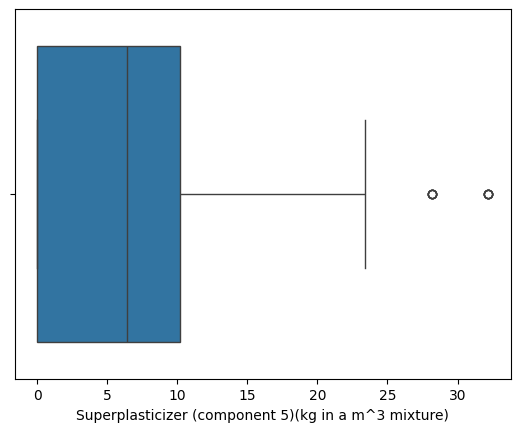

In [ ]:
import seaborn as sns
sns.boxplot(df, x='Superplasticizer (component 5)(kg in a m^3 mixture)')

# Histogram

In [ ]:
df.columns.to_numpy()

array(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate',
       'Age (days)', 'Compressive Strength (MPa)'], dtype=object)

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")
df.head()

# Plotting Histogram

fig = px.histogram(df, x='Cement (component 1)(kg in a m^3 mixture)', nbins=10, title='Histogram of Cement')

fig.update_layout(
    xaxis_title='Density',
    yaxis_title='Count',
    bargap=0.05
)

fig.show()

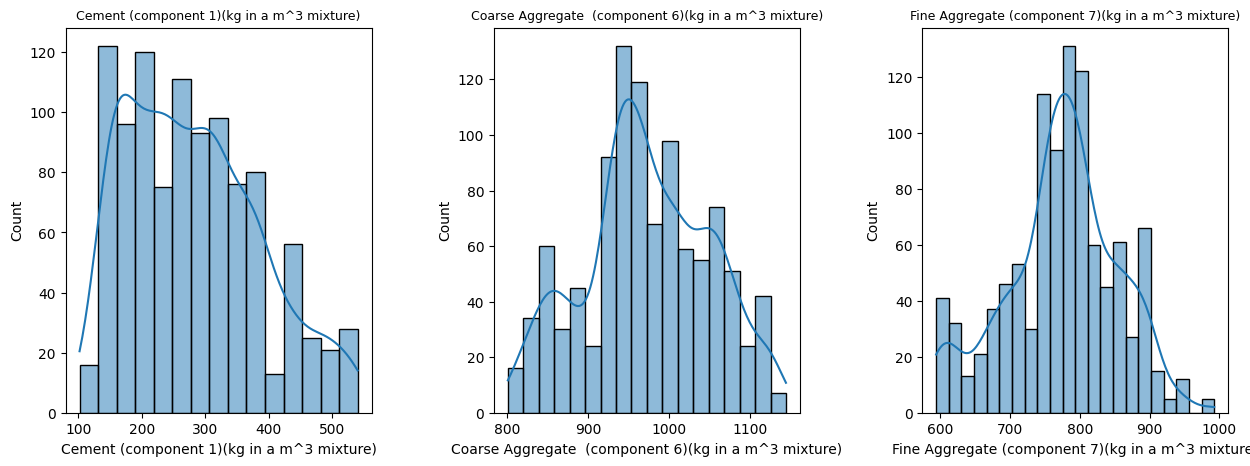

In [ ]:
# Plot histogram

col_idx = [0, 5, 6]

fig, ax = plt.subplots(1, 3, figsize=(15,5))



for i in range(0, 3):
  sns.histplot(data=df, x=df.columns[col_idx[i]], kde=True, ax=ax[i])
  ax[i].set_title(df.columns[col_idx[i]], fontsize=9)

plt.subplots_adjust(wspace=.4)

From observation, data of "Cement" skewed towards right-side. So, it is a positive-skew and rest of two seems symmetric (normal distribution).

In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age (days)',
       'Compressive Strength (MPa)'],
      dtype='object')

<Axes: xlabel='None', ylabel='None'>

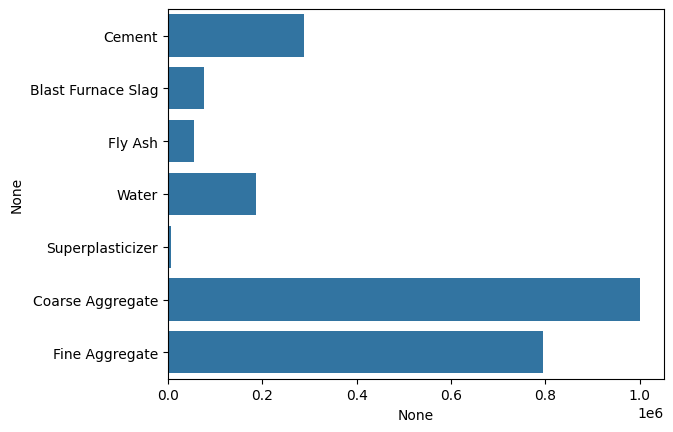

In [ ]:
sns.barplot(x=new_df.sum()[:-2], y=new_df.columns[:-2])

<Axes: xlabel='total', ylabel='Count'>

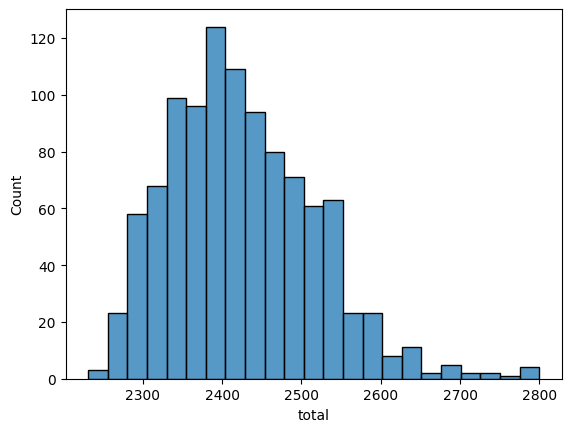

In [ ]:
new_df = df.copy()

new_df['total'] = new_df.sum(axis=1)

new_df.head()

sns.histplot(new_df, x='total')

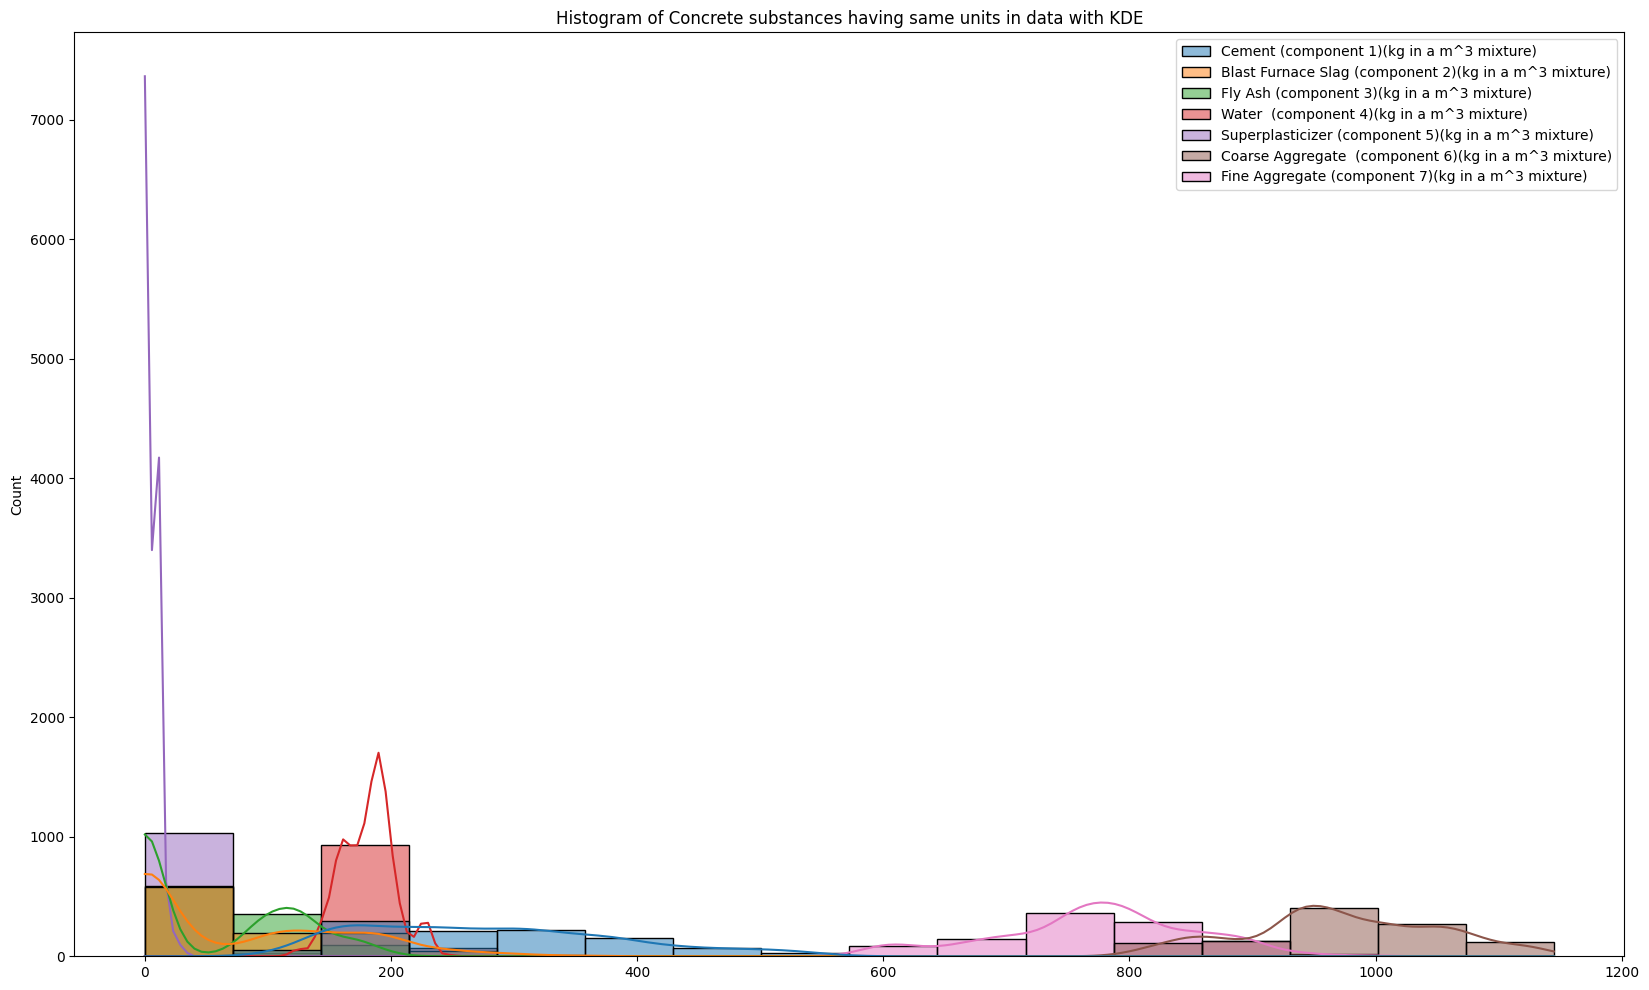

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")

# Remove potential whitespaces from the column names
df.columns = df.columns.str.strip()

# Specify columns to drop (ensure correct column names)
columns_to_drop = ['Age (day)', 'Concrete compressive strength(MPa, megapascals)']

# Drop specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot histogram
sns.histplot(data=df, kde=True)

plt.title('Histogram of Concrete substances having same units in data with KDE')
plt.show()

Above plot is a histogram of concrete ingredients having same unit with KDE (KernelDensity Estimation). We can visualize the distribution of mass density for multiple ingredients in a single plot.

# Scatter Plot

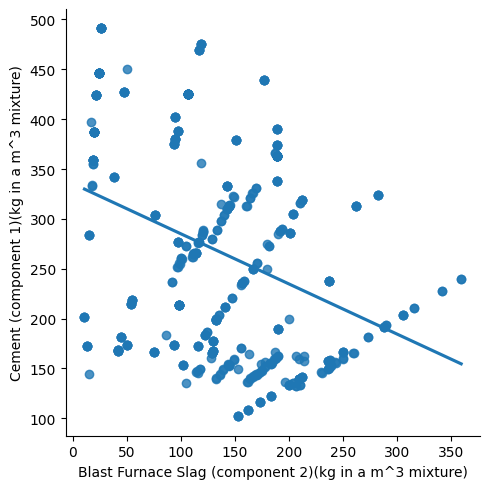

In [ ]:
# importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")

df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'][df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] != 0]

# use lmplot
sns.lmplot(y="Cement (component 1)(kg in a m^3 mixture)",
          x="Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
          ci=None,
          data=df[df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] > 0])

# Show the plot
plt.show()

<Axes: xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Water  (component 4)(kg in a m^3 mixture)'>

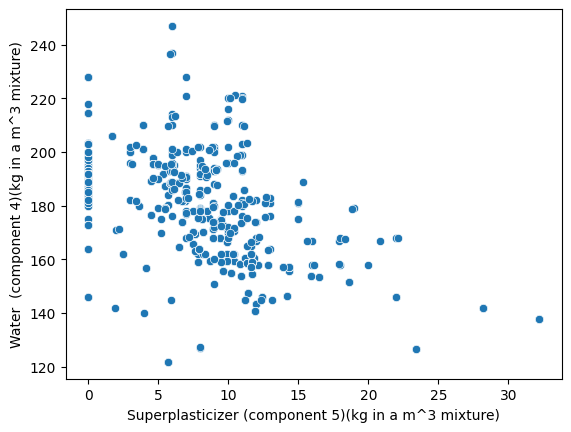

In [ ]:
sns.scatterplot(df, x='Superplasticizer (component 5)(kg in a m^3 mixture)', y='Water  (component 4)(kg in a m^3 mixture)')

# Pair Plot

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(1, 0.0, '0'),
  Text(1, 100.0, '100'),
  Text(1, 200.0, '200'),
  Text(1, 300.0, '300'),
  Text(1, 400.0, '400'),
  Text(1, 500.0, '500'),
  Text(1, 600.0, '600')])

<Figure size 70x40 with 0 Axes>

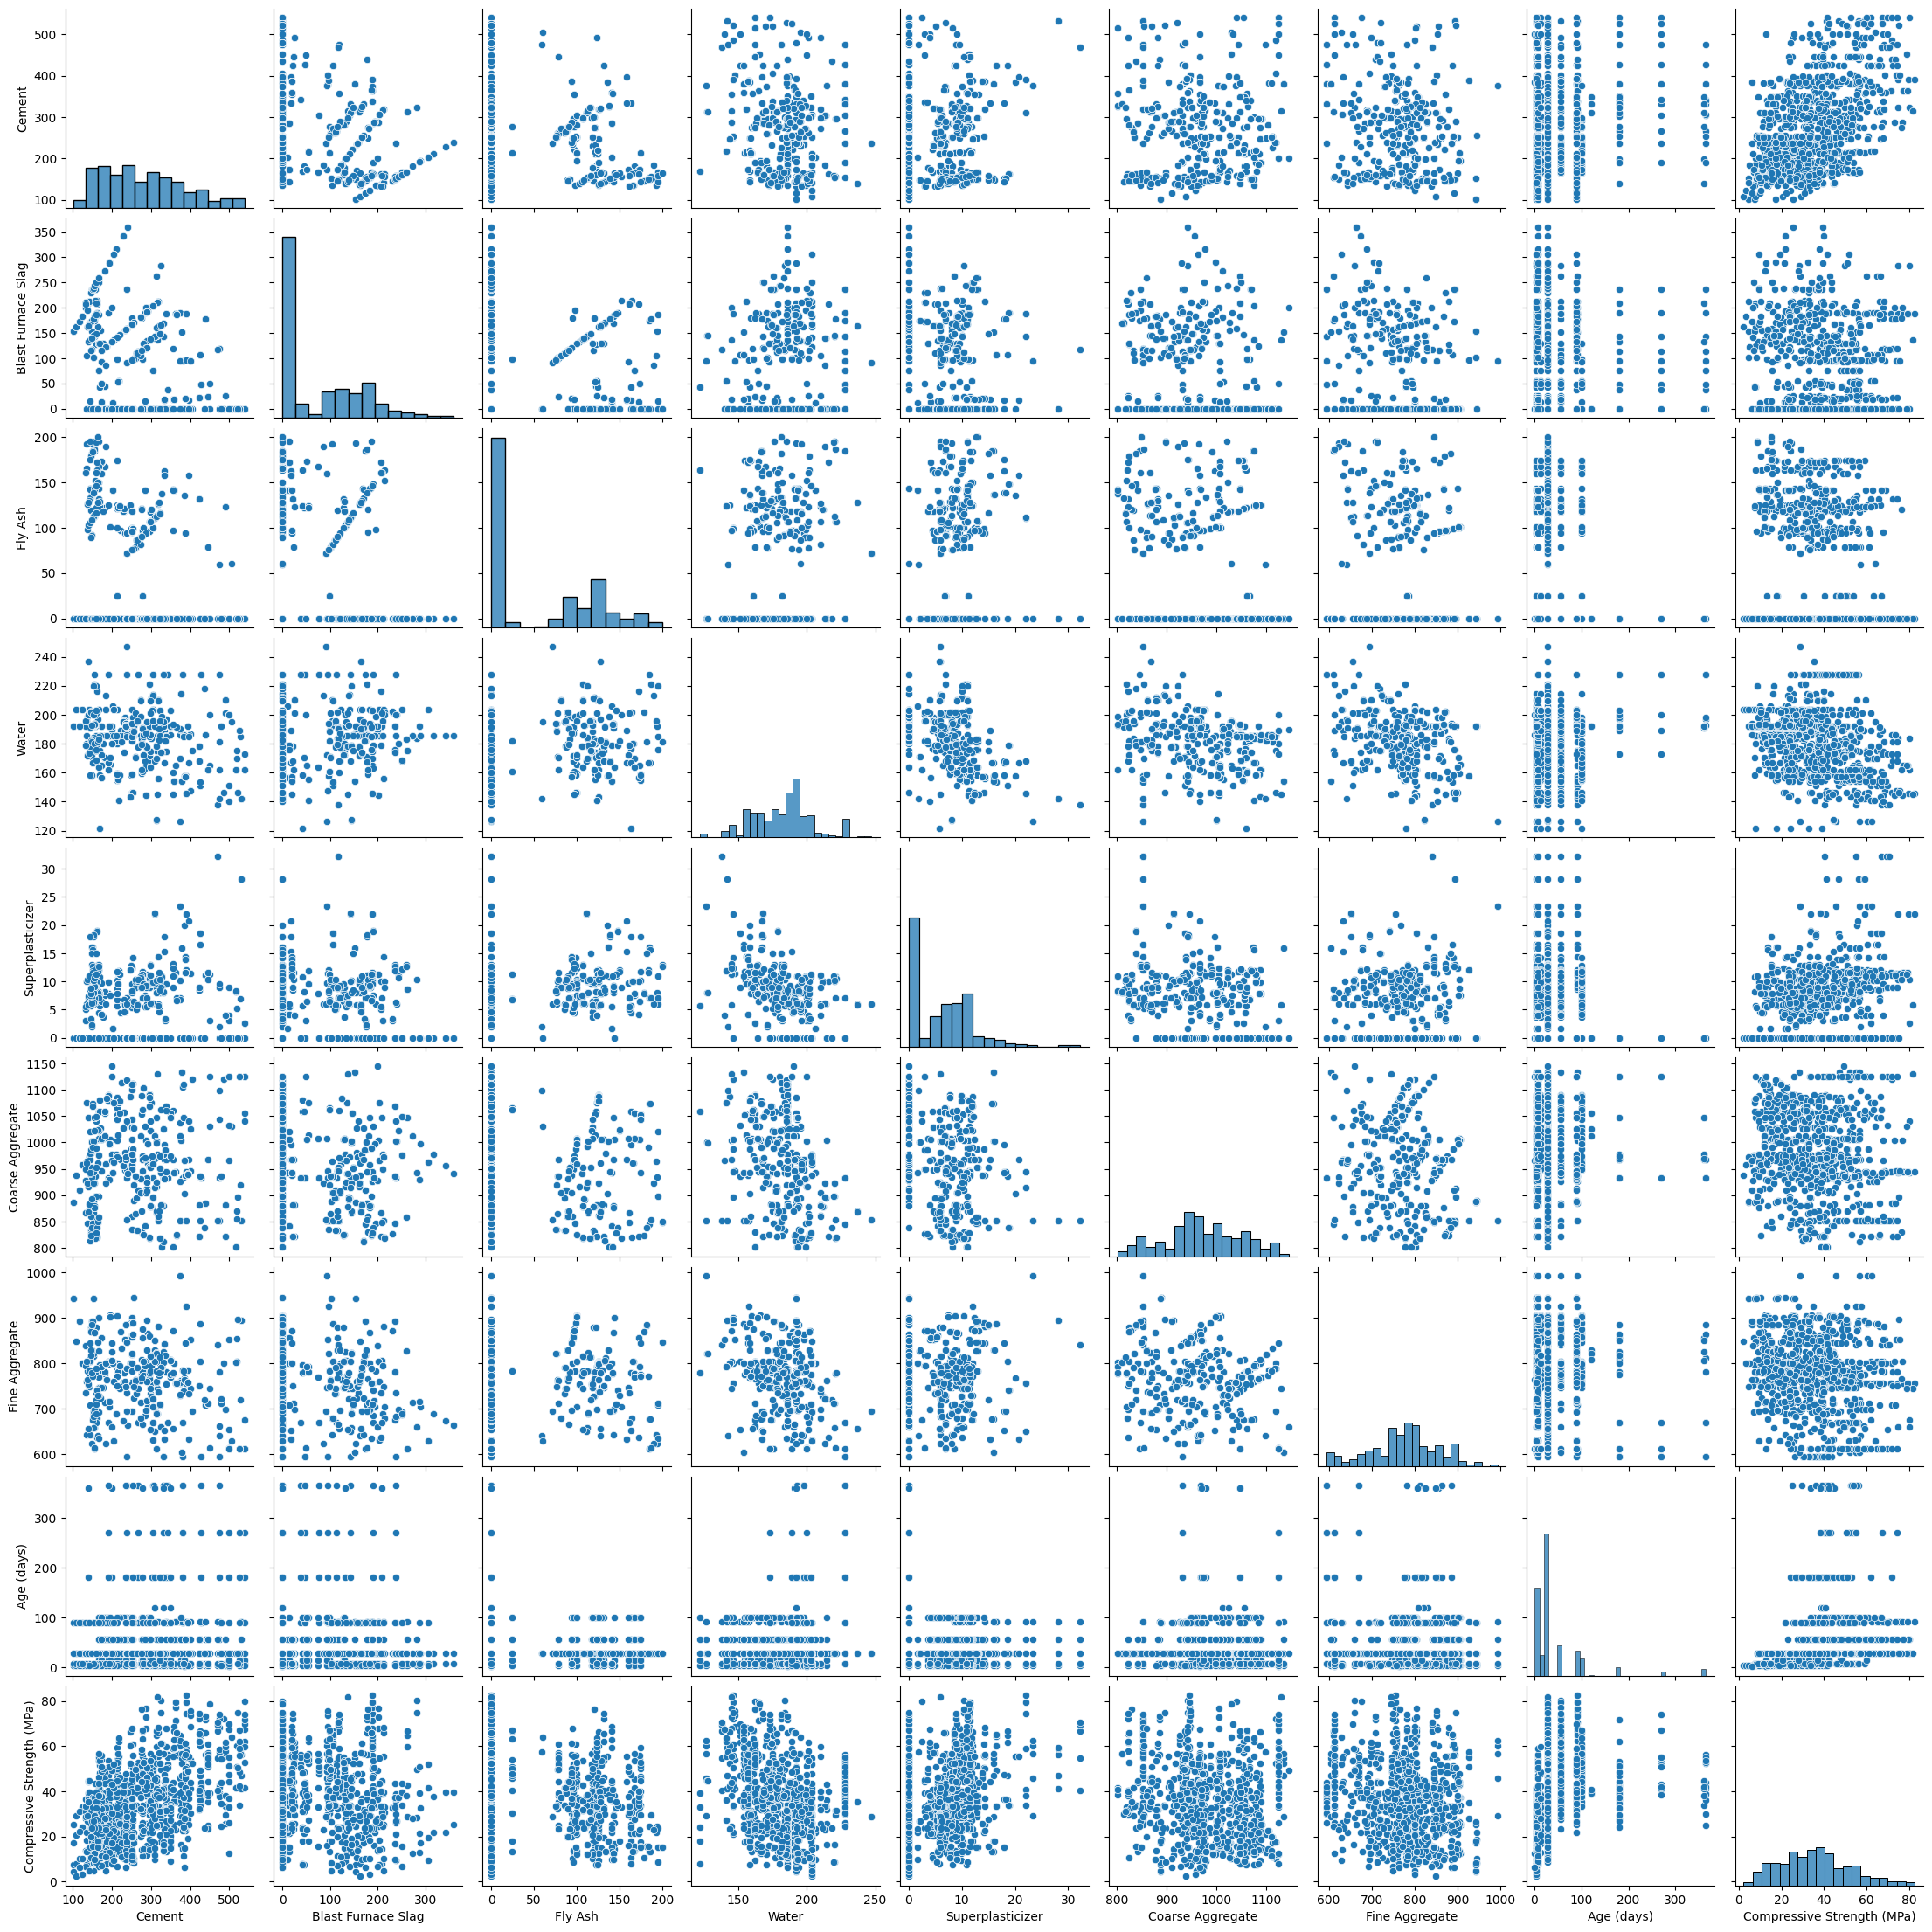

In [ ]:
# this is a great visual, let's try to get some summary points in here and maybe clean up the column names

plt.figure(figsize=(0.7, 0.4))
sns.pairplot(new_df)
plt.yticks(rotation=45)

It plots a pairwise relationship in the dataset, it will create a grid of axis where the y-axis belongs to row and the x-axis belongs to columns. It plots the correlation between each feature.

# Distribution


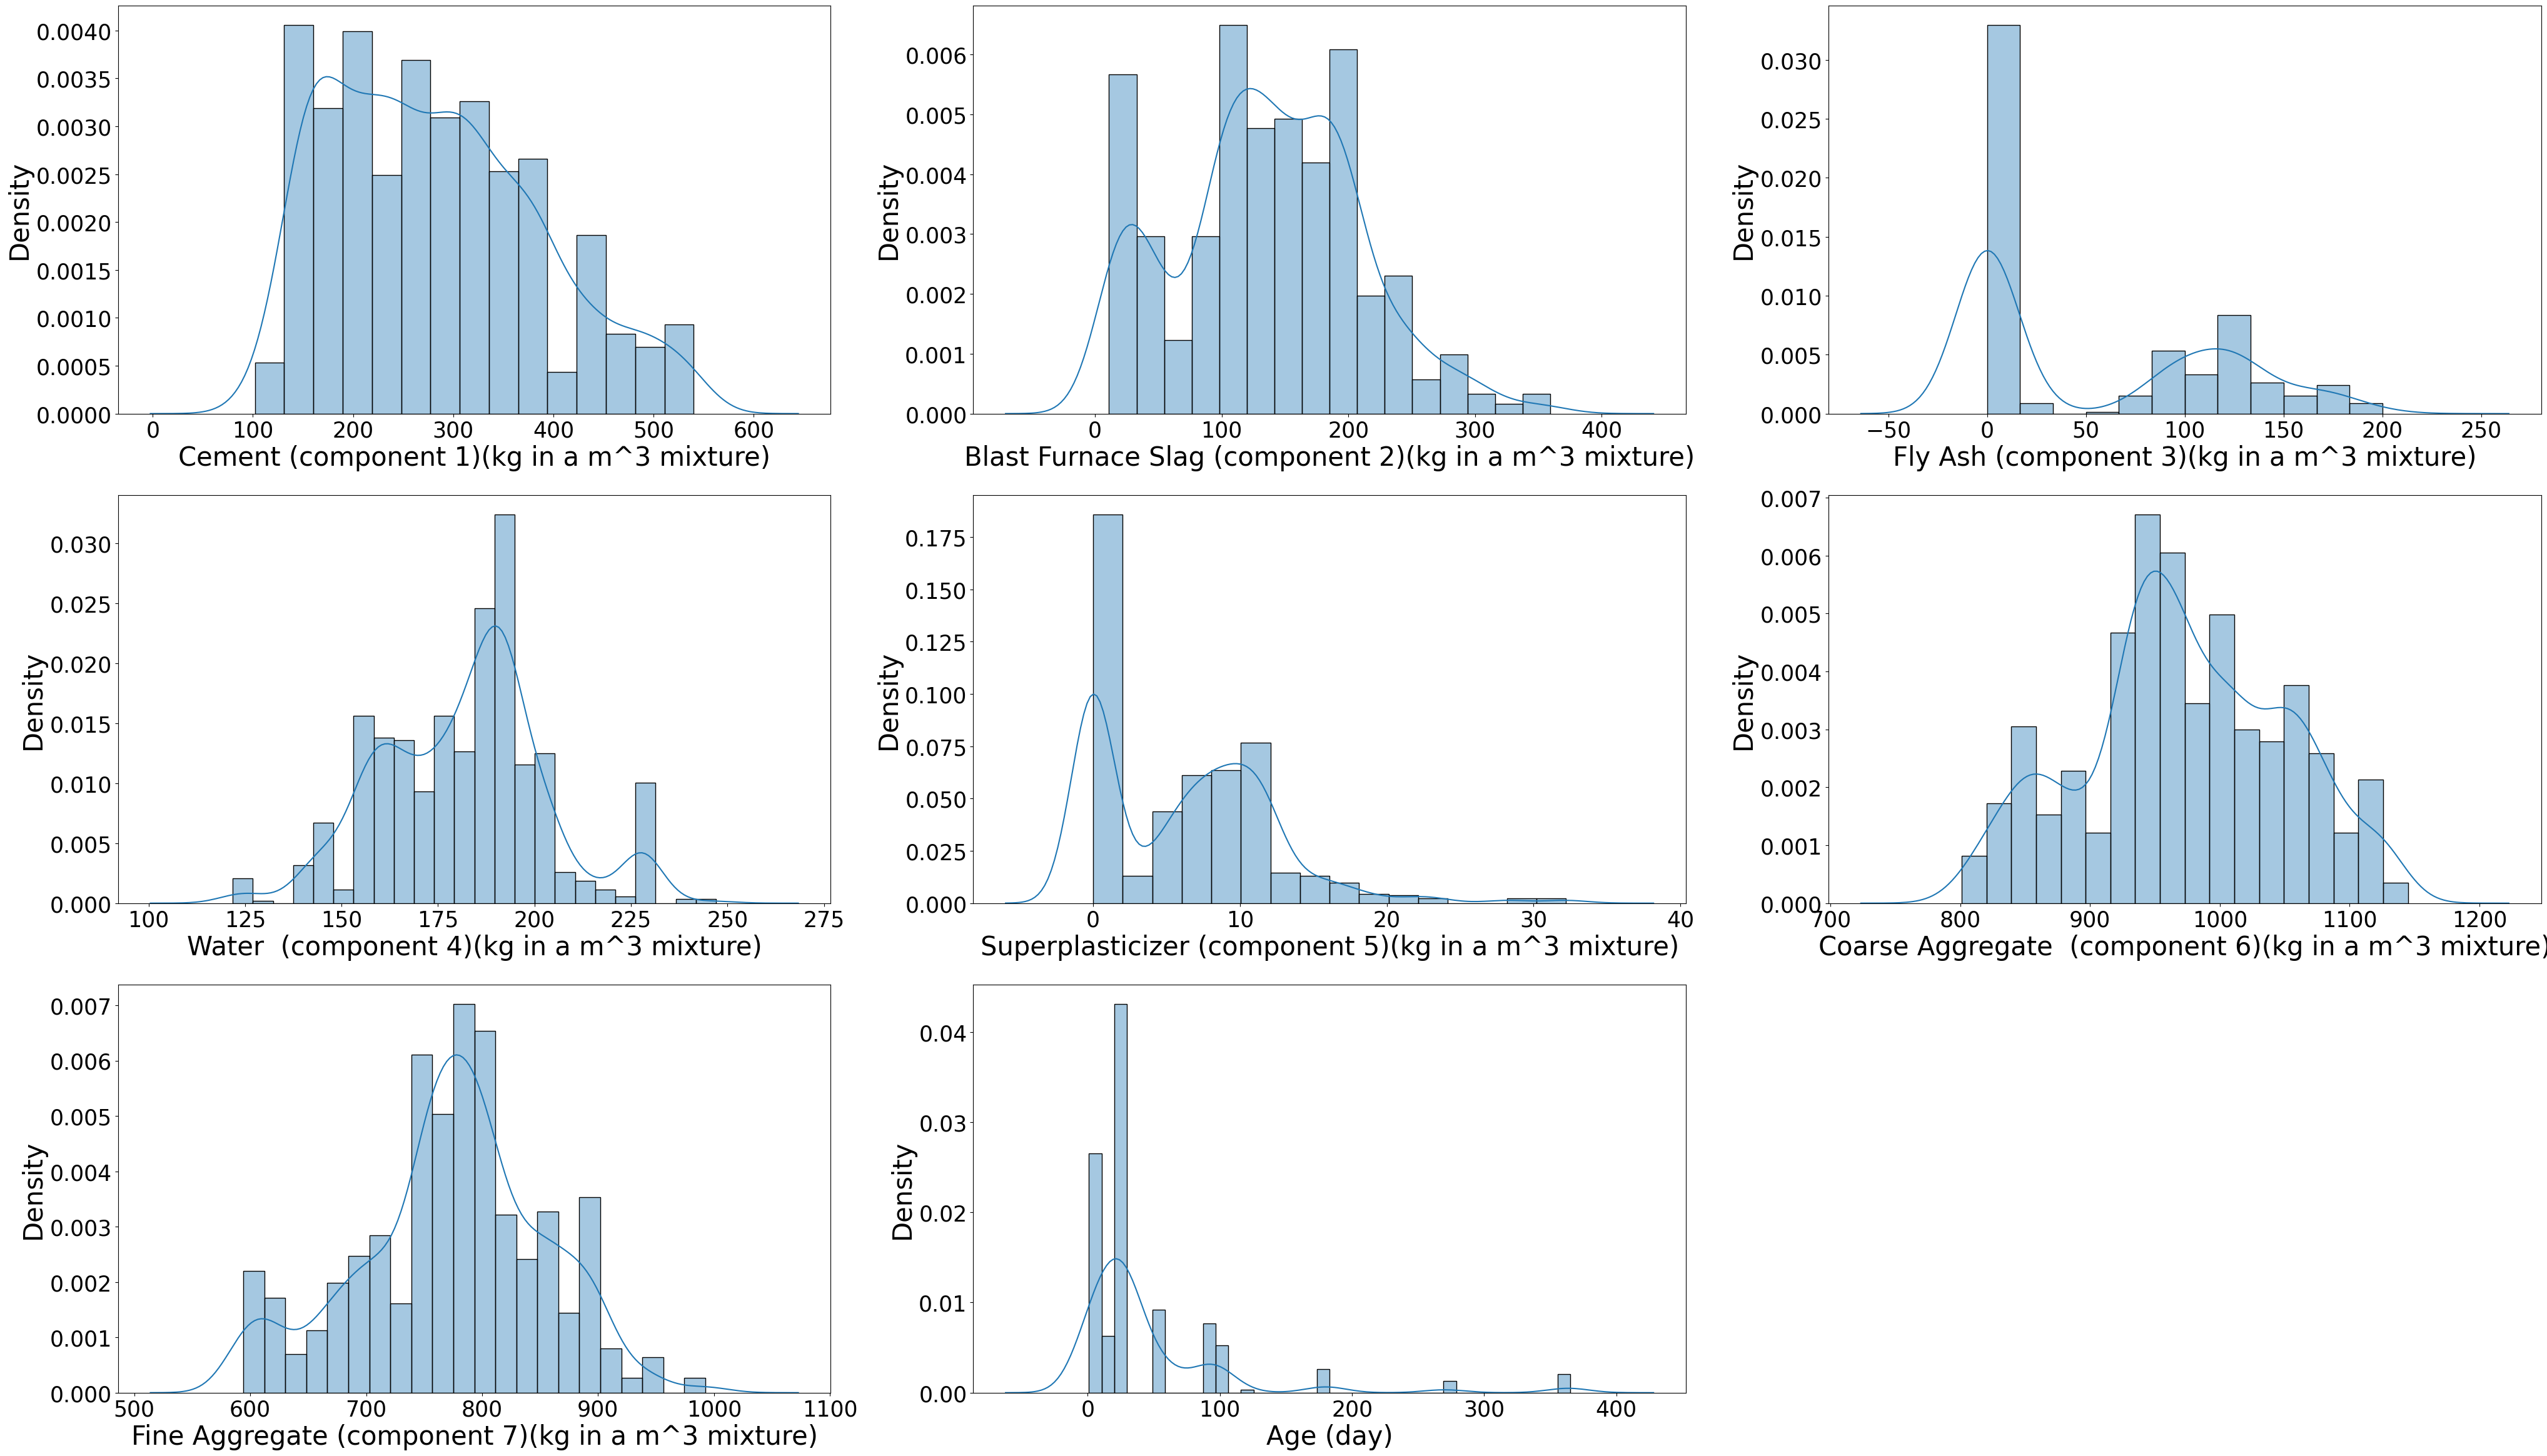

In [ ]:
import seaborn as sns

cols = list(df.columns)[:-1]
# cols = ['f00', 'f01','f03']
nrows = 10
ncols = 3
# plt.rcParams['figure.figsize'] = (50, 100)
# plt.rcParams['font.size'] = 25
# f, axes = plt.subplots(nrows, ncols, figsize=(20, 5), sharex=True)
with plt.rc_context({'figure.figsize':(50,100),'axes.labelsize':30, 'xtick.labelsize':25, 'ytick.labelsize':25}):
    for index,col in enumerate(cols):
#         print(col)
        plt.subplot(nrows,ncols,index+1)
        sns.histplot(df[col], stat="density", alpha=0.4, kde=True, kde_kws={"cut": 4})

    #     print(index)
        r = index//ncols
        c = index % ncols
    #     print(r,c)
    #     sns.boxplot(x="label", y=col, hue="label", palette="colorblind", data=df, ax=axes[r][c])
        # sns.stripplot(x='Class', y=col,  data=df,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')

    # df.boxplot()
    # print(list(df.columns)[:-1])
    plt.show()
    plt.clf()
    plt.close()

# Heatmap

<Axes: >

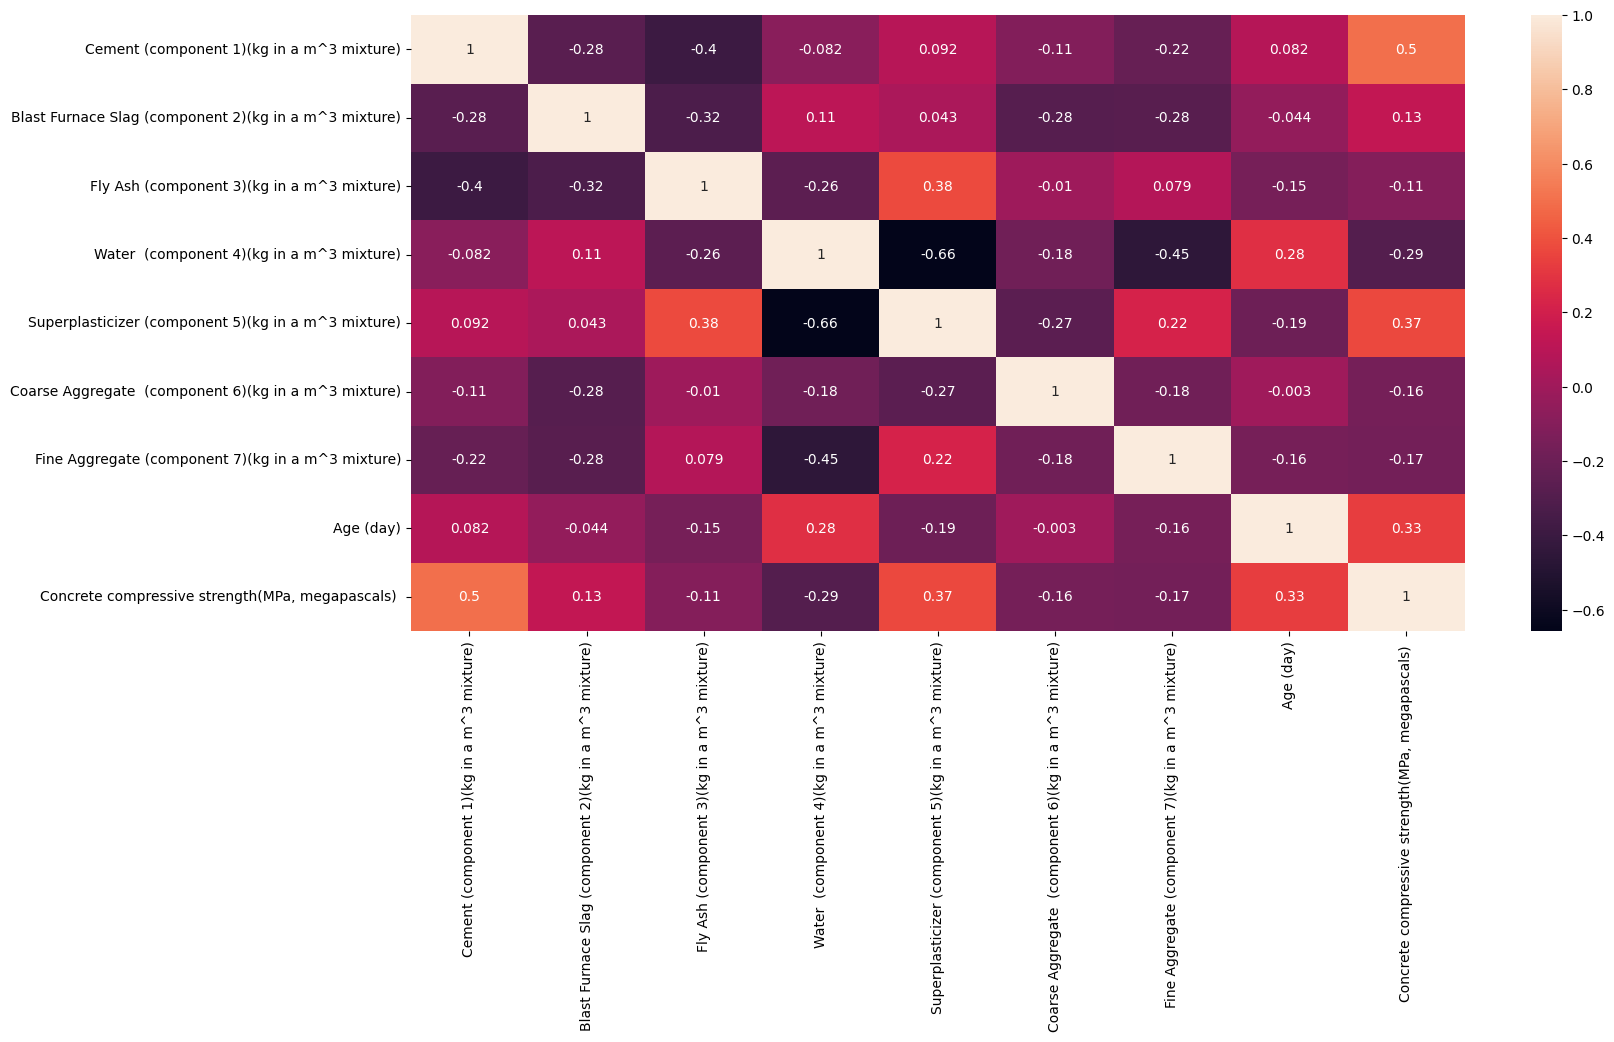

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/DipendraThapaMagar/CS624-Present1-/main/Concrete_Data.csv")

plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(df.corr(),annot=True)

Seabborn library is used to plot correlation between variables and it present one-to-one relationships between variables.From above heatmap observations, we find that Superplasticizer has a strong negative-correlation with water and diagonal line (having value 1) represents strong positive-correlation since every substance correlate with itself.

In [ ]:
# filtering to mixtures with Superplasticizer present in the mixture

water_sp_df = df[df['Superplasticizer (component 5)(kg in a m^3 mixture)'] > 0][['Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)']]

water_sp_df.corr()

,Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture)
Water (component 4)(kg in a m^3 mixture),1.000000,-0.538191
Superplasticizer (component 5)(kg in a m^3 mixture),-0.538191,1.000000


In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

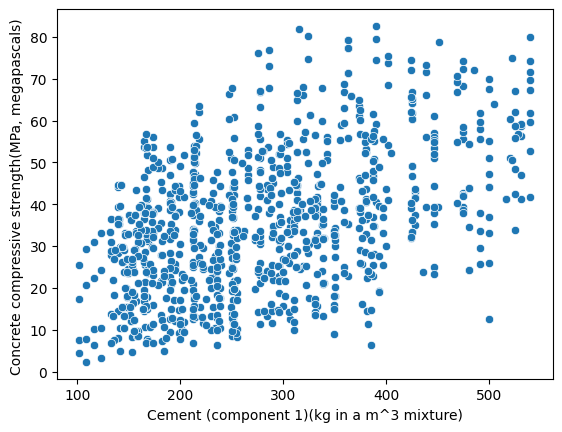

In [ ]:
sns.scatterplot(df, x='Cement (component 1)(kg in a m^3 mixture)', y='Concrete compressive strength(MPa, megapascals) ')

From heatmap, Cement and Concrete have 0.5 correlation. So, it shows positvie correlation in the observation.

<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)'>

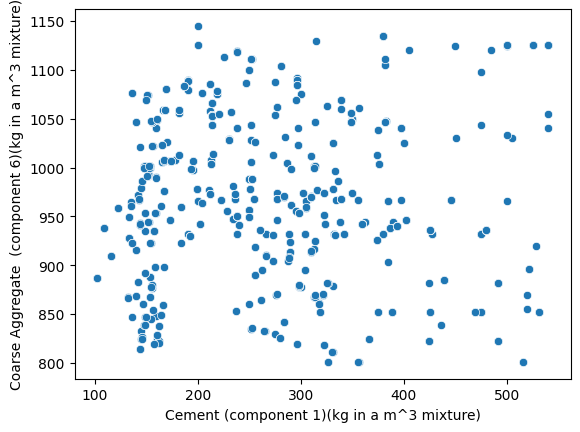

In [ ]:
sns.scatterplot(df, x='Cement (component 1)(kg in a m^3 mixture)', y='Coarse Aggregate  (component 6)(kg in a m^3 mixture)')

No correlation between Cement and Coarse Aggregate.

# Correlation Analysis

In [ ]:
## we could turn this into a heat map to get a good visual as well

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                                                    Cement (component 1)(kg in a m^3 mixture)  \
Cement (component 1)(kg in a m^3 mixture)                                            1.000000   
Blast Furnace Slag (component 2)(kg in a m^3 mi...                                  -0.275216   
Fly Ash (component 3)(kg in a m^3 mixture)                                          -0.397467   
Water  (component 4)(kg in a m^3 mixture)                                           -0.081587   
Superplasticizer (component 5)(kg in a m^3 mixt...                                   0.092386   
Coarse Aggregate  (component 6)(kg in a m^3 mix...                                  -0.109349   
Fine Aggregate (component 7)(kg in a m^3 mixture)                                   -0.222718   
Age (day)                                                                            0.081946   
Concrete compressive strength(MPa, megapascals)                                      0.497832   

                             